In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Eq d_w in Angstrom: 31.166166166166168


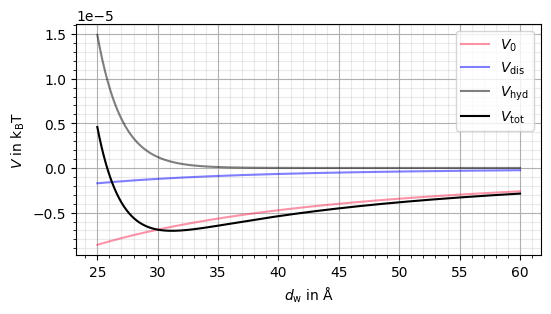

In [8]:
# +++ TASK 1 +++

# physical parameters
d_k = 9                     # length of the head group in Angstrom
a = 26.8                      # length of 2 tail groups (double chain) in Angstrom
T = 313                     # temperature T in K
k_B = 1.38e-23              # Boltzmann constant

H_stat = -0.6               # statische Hamakerkonstante
H_dis = -0.75               # dispersive Hamakerkonstante
H_0 = 4*k_B*T               # hydration energy at d_w = 0
lambda_h = 2                # in Angstrom



# static van-der-Waals potential contibution
def V_0(d_w):
    d_h = 2*d_k + d_w       # layer distance
    return H_stat * k_B*T / (12 * np.pi * d_h**2)


# dispersive van-der-Waals potential contribution
def V_dis(d_w):
    d_h = 2*d_k + d_w       # layer distance      
    factor_1 = H_dis * k_B*T / (16 * np.pi * d_h**2)
    factor_2 = 1 - (2 / (1+a/d_h)) + (1 / (1+2*a/d_h))
    return factor_1 * factor_2


# hydration potential
def V_hyd(d_w):
    return H_0 * np.exp(-d_w / lambda_h)


# sum of all 3 potentials
def V_tot(d_w):
    return V_0(d_w) + V_dis(d_w) + V_hyd(d_w)



# data generation
d_w_array = np.linspace(25, 60, 1000)
V_0_array = np.array([V_0(d_w) for d_w in d_w_array]) / (k_B*T)
V_dis_array = np.array([V_dis(d_w) for d_w in d_w_array]) / (k_B*T)
V_hyd_array = np.array([V_hyd(d_w) for d_w in d_w_array]) / (k_B*T)
V_tot_array = np.array([V_tot(d_w) for d_w in d_w_array]) / (k_B*T)


# calculate equilibrium r_w
min_V = 0
min_v_i = 0
for i in range(len(V_tot_array)):
    if (V_tot_array[i] < min_V):
        min_V = V_tot_array[i]
        min_v_i = i

d_w = d_w_array[min_v_i]
print(f"Eq d_w in Angstrom: {d_w}")


# plotting
fig, ax = plt.subplots(figsize=(6,3))
ax.set_xlabel(r'$d_\mathrm{w}$ in $\mathrm{\AA}$')      # \mathrm{\AA} wird im notebook angezeigt aber nicht im pgf plot!! dazu durch \si{\AA} in der .pgf ersetzen!!
ax.set_ylabel(r'$V$ in $\mathrm{k_BT}$')
ax.grid()
ax.grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
ax.minorticks_on()

ax.plot(d_w_array, V_0_array, color = "xkcd:red pink", alpha = 0.5, label = r"$V_\mathrm{0}$")
ax.plot(d_w_array, V_dis_array, color = "blue", alpha = 0.5, label = r"$V_\mathrm{dis}$")
ax.plot(d_w_array, V_hyd_array, color = "black", alpha = 0.5, label = r"$V_\mathrm{hyd}$")
ax.plot(d_w_array, V_tot_array, color = "black", alpha = 1, label = r"$V_\mathrm{tot}$")

ax.legend()
ax.legend(loc="upper right")


# ax[1].set_xlabel(r'$d_\mathrm{w}$ in $\AA$')
# ax[1].set_ylabel(r'$V$ in $\mathrm{k_BT}$')
# ax[1].grid()
# ax[1].grid(which='minor', color = '#999999', alpha = 0.2, linestyle = '-')
# ax[1].minorticks_on()

# ax[1].plot(d_w_array, V_0_array, color = "xkcd:red pink", alpha = 0.5, label = r"$V_\mathrm{0}$")
# ax[1].plot(d_w_array, V_dis_array, color = "blue", alpha = 0.5, label = r"$V_\mathrm{dis}$")
# ax[1].plot(d_w_array, V_hyd_array, color = "black", alpha = 0.5, label = r"$V_\mathrm{hyd}$")
# ax[1].plot(d_w_array, V_tot_array, color = "black", alpha = 1, label = r"$V_\mathrm{tot}$")

# ax[1].legend()
# ax[1].legend(loc="upper right")


plt.savefig('BK.SLM_visualizations/V_membrane_over_dw.pdf', facecolor = 'white', bbox_inches='tight')
plt.savefig('BK.SLM_visualizations/V_membrane_over_dw.pgf', facecolor = 'white', bbox_inches='tight')
plt.show()

In [9]:
# +++ TASK 2 +++

# given parameters
A_H = 72.4                              # area in A^2 of the head group
d_k = 9                                 # height of the head group in A
a = 26.8                                # length of carbohydrate core

# calculated parameters
r_k = np.sqrt(A_H/2/np.pi)              # radius of head group and carbohydrate core
l_C = a / 2                             # length of fatty acid chain

# volumes
V_head = 4/3 *np.pi * r_k**2 * d_k      # volume of head group
V_tail = A_H * l_C                      # volume of lipid tail

print(f"V_head: {V_head}")
print(f"V_tail: {V_tail}")


# number of electrons per atom type
atom_e_dict = {
    "Hydrogen": 1,
    "Carbon": 6,
    "Nitrogen": 7,
    "Oxygen": 8,
    "Phosphorus": 15,
}


# number of atom type in head
head_atom_dict = {
    "Hydrogen": 18,
    "Carbon": 8,
    "Nitrogen": 1,
    "Oxygen": 6,
    "Phosphorus": 1,
}

tail_atom_dict = {
    "Hydrogen": 33+33,
    "Carbon": 18+18,
    "Nitrogen": 0,
    "Oxygen": 2,
    "Phosphorus": 0,
}


n_e_head = sum([head_atom_dict[key]*atom_e_dict[key] for key in head_atom_dict])
n_e_tail = sum([tail_atom_dict[key]*atom_e_dict[key] for key in tail_atom_dict])

print(f"n_e_head: {n_e_head}")
print(f"n_e_tail: {n_e_tail}")

e_density_head = n_e_head / V_head
e_density_tail = n_e_tail / V_tail

print(f"e_density_head: {e_density_head}")
print(f"e_density_tail: {e_density_tail}")


D = 2*d_k + d_w + a
print(d_k, d_w, a)
print(f"periodicity: {D}")

V_head: 434.4
V_tail: 970.1600000000001
n_e_head: 136
n_e_tail: 298
e_density_head: 0.3130755064456722
e_density_tail: 0.30716582831697864
9 31.166166166166168 26.8
periodicity: 75.96616616616616


In [32]:
np.sqrt(20**2+44**2)
np.arctan(1/4)*360/2/np.pi


draht__A = np.pi * (0.1/2)**2
strom_I = 1 / 6000

mag_B_coil = 1.26e-6*10000/0.1*strom_I

mag_B_coil * 10e9, strom_I

(210000.0, 0.00016666666666666666)

In [34]:
rho_kupfer = 0.0171
A_draht = np.pi * (0.1)**2 / 4
l_draht = 0.25 * 10000

R_kupferdraht = rho_kupfer / A_draht * l_draht
R_kupferdraht

5443.099053742821